The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [156]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
df = pd.read_csv('data/nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### Exploratory data analysis

In [158]:
df.isnull().any()

year                    False
category                False
prize                   False
motivation               True
prize_share             False
laureate_id             False
laureate_type           False
full_name               False
birth_date               True
birth_city               True
birth_country            True
sex                      True
organization_name        True
organization_city        True
organization_country     True
death_date               True
death_city               True
death_country            True
dtype: bool

In [159]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

### Most common gender and birth country

In [160]:
# finding most common gender
gender = df['sex'].value_counts()
top_gender = gender.idxmax()

# finding the most common birth country
country = df['birth_country'].value_counts()
top_country = country.idxmax()

print('The most commonly awarder gender is: ', top_gender)
print('The most commonly awarder birth country is: ', top_country)

The most commonly awarder gender is:  Male
The most commonly awarder birth country is:  United States of America


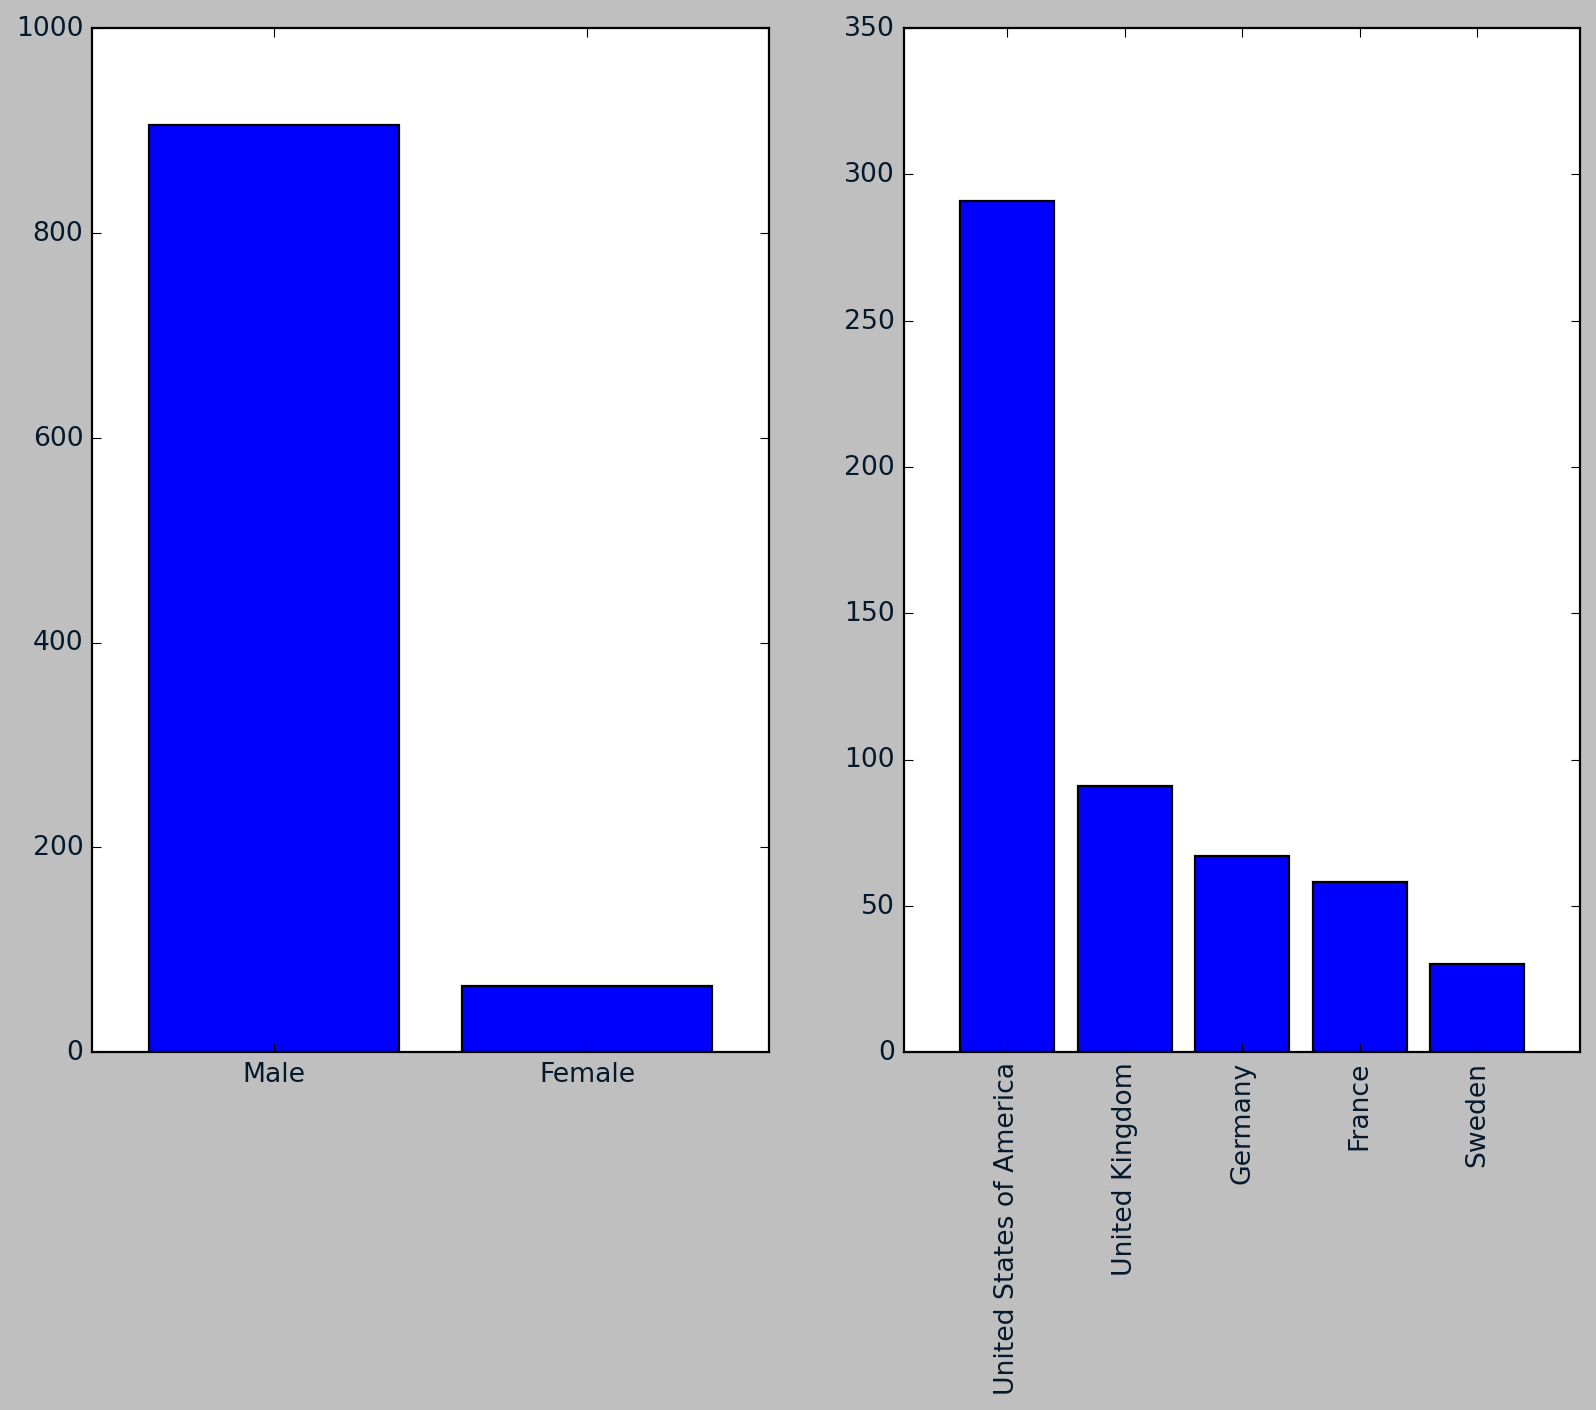

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64

In [161]:
# visualizing it

plt.style.use('classic')
fig, ax = plt.subplots(1,2,figsize=(12,8))

# gender
ax[0].bar(gender.index, gender.values)
ax[0].margins(x=0.1)
ax[0].set_ylim(0,1000)

# birth country
ax[1].bar(country.head().index, country.head().values)
ax[1].margins(x=0.1)
ax[1].set_ylim(0,350)
ax[1].set_xticklabels(country.index, rotation=90)

# showing
plt.show()
country


### Decade with highest US-born laureates

In [162]:
df['dec'] = (df['year'] // 10) * 10
df['decade'] = df['dec'].astype(str) + '-' + (df['dec'] + 9).astype(str)

df_decadal = pd.crosstab(df['dec'], df['birth_country'])
max_decade_usa = df_decadal['United States of America'].idxmax()
max_decade_usa

2000

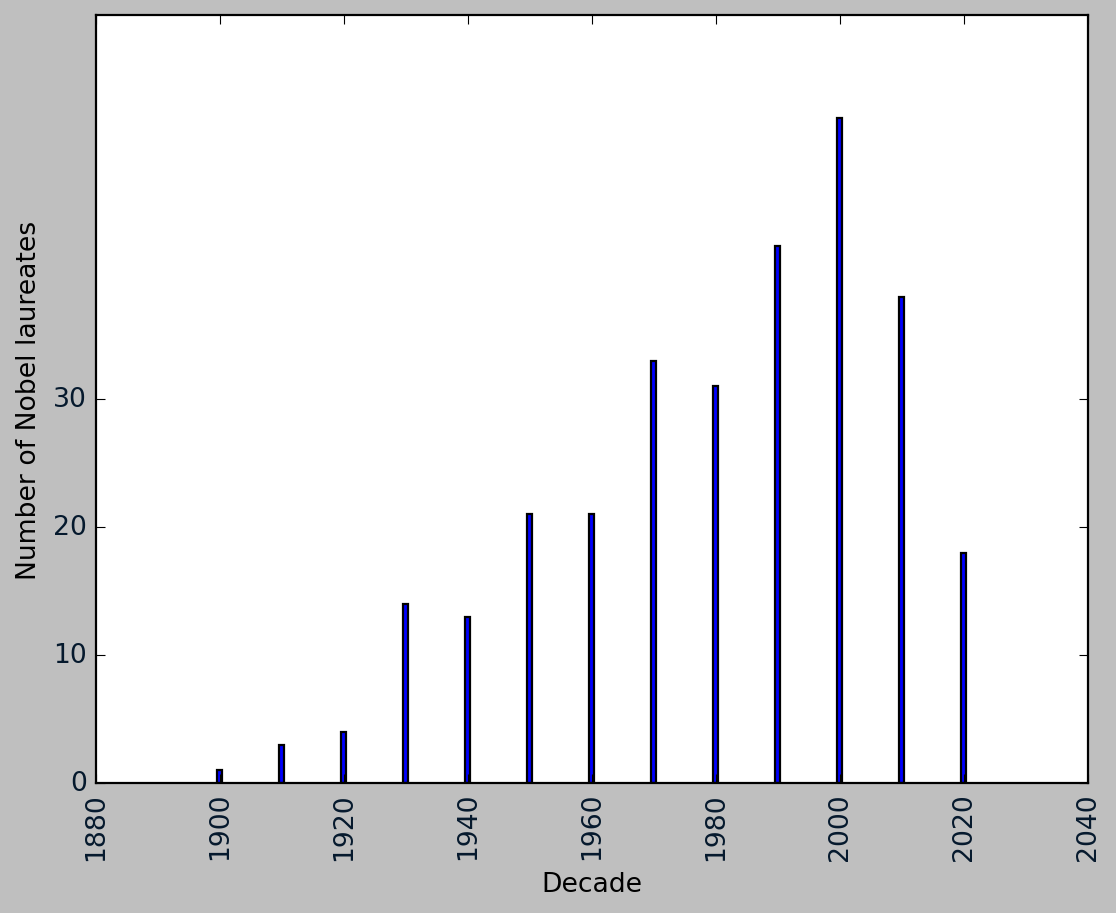

In [163]:
# visualizing
plt.style.use('classic')
plt.bar(df_decadal.index, df_decadal['United States of America'])
plt.xticks(rotation=90)
plt.yticks(np.arange(0,40,10))
plt.xlabel("Decade")
plt.ylabel("Number of Nobel laureates")
plt.show()

### Highest proportion of female laureates

In [164]:
df_decade_gender = df.groupby(['dec', 'category', 'sex']).size().unstack(['category', 'sex'], fill_value=0)
categories = df_decade_gender.columns.get_level_values(0).unique()
for c in categories:
    male_total = df_decade_gender[(c,'Male')] if (c, 'Male') in df_decade_gender.columns else 0
    female_total = df_decade_gender[(c,'Female')] if (c, 'Female') in df_decade_gender.columns else 0

    total = male_total + female_total
    male_ratio = (male_total / total).fillna(0)
    female_ratio = (female_total / total).fillna(0)

    df_decade_gender[f'{c}_male_ratio'] = male_ratio
    df_decade_gender[f'{c}_female_ratio'] = female_ratio

female_ratio_values = pd.DataFrame(
    {f"{c}_female_ratio": df_decade_gender[f"{c}_female_ratio"] for c in categories}
)

female_ratio_values.columns = [col.replace('_female_ratio', '') for col in female_ratio_values.columns]

female_ratio_values_sorted = female_ratio_values.loc[
    female_ratio_values.assign(
        max_val=female_ratio_values.max(axis=1),
        max_count=female_ratio_values.eq(female_ratio_values.max(axis=1), axis=0).sum(axis=1)
    ).sort_values(['max_val', 'max_count'], ascending=[False, False]).index
]
female_ratio_values_sorted

max_value = female_ratio_values_sorted.max().max()  # Maximum value across all columns and rows
max_location = female_ratio_values_sorted.stack().idxmax()  # (decade, category) where max occurs

max_female_dict = {max_location[0]:max_location[1]}
max_female_dict

{2020: 'Literature'}

### First female laureate

In [165]:
df_female = df[df['sex']=='Female'][['sex', 'year', 'category', 'full_name']]
first_woman_name = df_female.iloc[0]['full_name']
first_woman_category = df_female.iloc[0]['category']
print(first_woman_name, first_woman_category)

Marie Curie, née Sklodowska Physics


### Repeated Laureates

In [166]:
repeat = df['full_name'].value_counts()
repeat_list = []
for name, count in repeat.items():
    if count>1:
        repeat_list.append(name)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']